Importing the Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics

Loading the csv file

In [8]:
from google.colab import files 
uploaded = files.upload()

Saving Final Dataset.xlsx - Sheet1.csv to Final Dataset.xlsx - Sheet1 (1).csv


Reading the csv file

In [13]:
import io
df=pd.read_csv("Final Dataset.xlsx - Sheet1.csv")

Getting columns names inside my dataset

In [14]:
df.columns

Index(['PROD_CD', 'SLSMAN_CD', 'PLAN_MONTH', 'PLAN_YEAR', 'TARGET_IN_EA',
       'ACH_IN_EA'],
      dtype='object')

First 20 observation

In [15]:
df.head(20)

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,PROD_3,SLSMAN_1,10,2019,80,0
1,PROD_3,SLSMAN_1,11,2019,80,0
2,PROD_3,SLSMAN_1,12,2019,40,0
3,PROD_5,SLSMAN_1,10,2019,160,211
4,PROD_5,SLSMAN_1,11,2019,160,173
5,PROD_5,SLSMAN_1,12,2019,240,175
6,PROD_8,SLSMAN_1,10,2019,0,7
7,PROD_10,SLSMAN_1,10,2019,0,82
8,PROD_10,SLSMAN_1,11,2019,0,79
9,PROD_10,SLSMAN_1,12,2019,0,59


CONVERTING CATEGORICAL VARIABLES INTO NUMERICAL VALUES.

In [16]:
Le=preprocessing.LabelEncoder()
df_new=df
df_new["PROD_CD"]=Le.fit_transform(df["PROD_CD"])
df_new["SLSMAN_CD"]=Le.fit_transform(df["SLSMAN_CD"])


# I can see the variable called "TARGET_IN_EA" and "ACH_IN_EA" is containing comas(,) B/W the numbers.
#so I would like to remove those comas from there using string.replace()

In [17]:
df['TARGET_IN_EA'] = df['TARGET_IN_EA'].str.replace(',', '').astype(float)
df['ACH_IN_EA'] = df['ACH_IN_EA'].str.replace(',', '').astype(float)

Removing Year variable from the dataset

In [18]:
df=df.drop(["PLAN_YEAR"],axis=1)


Dimension of dataset

In [29]:
df.shape

(22469, 5)

Next I would like to check the outliers and remove them

In [19]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)


[[0.51171738 1.64043602 1.29826521 0.34376698 0.35010729]
 [0.51171738 1.64043602 0.0496255  0.34376698 0.35010729]
 [0.51171738 1.64043602 1.19901422 0.34747329 0.35010729]
 ...
 [1.60115336 0.46094405 1.19901422 0.3511796  0.34973024]
 [1.72792561 0.46094405 0.0496255  0.3511796  0.33860732]
 [1.72792561 0.46094405 1.19901422 0.3511796  0.33031227]]


putting threshold value as 9

In [20]:
threshold = 9
New_df = df[(z < 9).all(axis=1)]

Checking the Correlation Between the varables.

In [21]:
New_df.corr()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,TARGET_IN_EA,ACH_IN_EA
PROD_CD,1.000000,0.007582,0.067888,-0.097324,-0.073687
SLSMAN_CD,0.007582,1.000000,0.002923,0.010748,0.015662
PLAN_MONTH,0.067888,0.002923,1.000000,-0.030547,-0.024380
TARGET_IN_EA,-0.097324,0.010748,-0.030547,1.000000,0.880425
ACH_IN_EA,-0.073687,0.015662,-0.024380,0.880425,1.000000


Dimension of the new dataset

In [22]:
New_df.shape

(22435, 5)

Dimension of the old dataset

In [23]:
df.shape

(22469, 5)

Above we can see there is 34 records diffrence b/w the new dataset and old dataset.

In [24]:
New_df.head(10)

,PROD_CD,SLSMAN_CD,PLAN_MONTH,TARGET_IN_EA,ACH_IN_EA
0,22,0,10,80.0,0.0
1,22,0,11,80.0,0.0
2,22,0,12,40.0,0.0
3,44,0,10,160.0,211.0
4,44,0,11,160.0,173.0
5,44,0,12,240.0,175.0
6,77,0,10,0.0,7.0
7,1,0,10,0.0,82.0
8,1,0,11,0.0,79.0
9,1,0,12,0.0,59.0


Splitting the input variables in a dataframe called predictor and splitting the output variable in a dataframe called output 

In [25]:
predictor=New_df.iloc[:,0:4]
target=pd.DataFrame(New_df.iloc[:,4])

In [37]:
predictor

,PROD_CD,SLSMAN_CD,PLAN_MONTH,TARGET_IN_EA
0,22,0,10,80.0
1,22,0,11,80.0
2,22,0,12,40.0
3,44,0,10,160.0
4,44,0,11,160.0
...,...,...,...,...
22464,67,140,11,0.0
22465,67,140,12,0.0
22466,72,140,12,0.0
22467,75,140,11,0.0


#spliting the data's into Xtrain,Ytrain,Xtest,Ytest and Ytest


In [26]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(predictor,target,test_size=0.2,random_state=0)

**Model Building** 

Model-1 using RANDOM FOREST REGRESSOR

In [30]:
from sklearn.ensemble import RandomForestRegressor


Training the model

In [172]:
RF = RandomForestRegressor(n_estimators = 1000,oob_score = True,n_jobs = -1,random_state =2)
RF.fit(Xtrain,Ytrain)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=True,
                      random_state=2, verbose=0, warm_start=False)

Accuracy score for test data

In [173]:
RF.score(Xtest,Ytest)

0.8841884975005025

Accuracy score for train data

In [174]:
RF.score(Xtrain,Ytrain)

0.9840545755178572

Predicting the outcomes

In [175]:
RF_pred=RF.predict(Xtest)

Rmse

In [176]:
rmse_linear = np.sqrt(np.mean((np.array(Ytest['ACH_IN_EA'])-np.array(RF_pred))**2))
rmse_linear


3060.7314348438827

MSE

In [177]:
metrics.mean_squared_error(Ytest,RF_pred)

9368076.916241493

MEAN ABSOLUTE ERROR

In [178]:
metrics.mean_absolute_error(Ytest,RF_pred)

1001.0882048139069

In [46]:
pd.DataFrame(RF_pred)

,0
0,1616.653
1,2193.729
2,85.877
3,303.830
4,325.558
...,...
4482,115.892
4483,421.896
4484,1767.782
4485,21749.433


In [ ]:
import matplotlib.pyplot as plt 

Scatter plot for predicted v/s actual data.

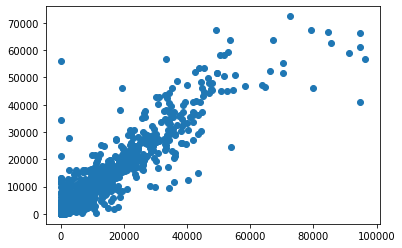

In [ ]:
plt.scatter(Ytest,RF6_pred)

MODEL-2 using Random forest Regressor by using Regularization technique.

In [51]:
RF2 = RandomForestRegressor(n_estimators = 100,oob_score = True,n_jobs = -1,random_state =1)


Training the  model

In [52]:
RF2.fit(Xtrain,Ytrain)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=True,
                      random_state=1, verbose=0, warm_start=False)

Accuracy score for test data

In [55]:
RF2.score(Xtest,Ytest)

0.8802565085776038

Accuracy score for train data

In [54]:
RF2.score(Xtrain,Ytrain)

0.9835104206213634

In [ ]:
RMSE

In [ ]:
rmse_linear = np.sqrt(np.mean((np.array(Ytest['ACH_IN_EA'])-np.array(RF2_pred))**2))
rmse_linear


2219.6737952772332

MSE

In [57]:
metrics.mean_squared_error(Ytest,RF2_pred)

9686138.368416201

MEAN ABSOLUTE ERROR

In [58]:
metrics.mean_absolute_error(Ytest,RF2_pred)

1008.3125763316245

Prediction

In [60]:
RF2_pred=RF2.predict(Xtest)

In [61]:
pd.DataFrame(RF2_pred)

,0
0,1519.70
1,1765.88
2,87.36
3,308.02
4,310.03
...,...
4482,115.54
4483,447.21
4484,1660.93
4485,20588.44


Scatter plot for prediced v/s actual data.

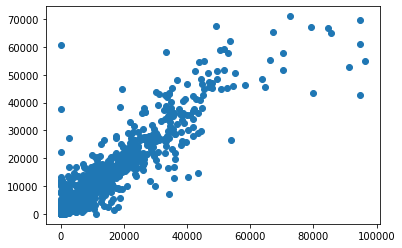

In [63]:
import matplotlib.pyplot as plt 
plt.scatter(Ytest,RF2_pred)

Model-3 using RandomizedsearchCV with RandomForestRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


Hyper parameter tuning

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf = RandomForestRegressor()


Building the model

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

Training the model

In [ ]:
rf_random.fit(Xtrain,Ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 63.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

Accuracy score for test data

In [ ]:
rf_random.score(Xtest,Ytest)

0.9010418240664319

Accuracy score for train data

In [ ]:
rf_random.score(Xtrain,Ytrain)

0.9792913460098631

Prediction

In [ ]:
Random_predicted=rf_random.predict(Xtest)

Model Evaluation

RMSE

In [ ]:
Rmse = (np.sqrt(mean_squared_error(Ytest, Random_predicted)))
print(Rmse)

2829.2753553891707


MSE

In [ ]:
metrics.mean_squared_error(Ytest,Random_predicted)

8004799.036612517

MEAN ABSOLUTE ERROR

In [ ]:
metrics.mean_absolute_error(Ytest,Random_predicted)

956.9937003683842

SCATTER PLOT FOR PEDICTED VALUE V/S ACTUAL

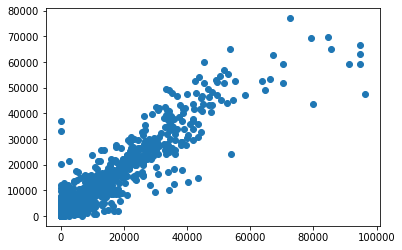

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(Ytest,predicted)

Model-4 using GridSearchCV with RandomForest Regressor

Hyper parameter tuning

In [27]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

GRID SEARCH CV WITH RANDOM FOREST REGRESSOR

In [28]:
from sklearn.model_selection import GridSearchCV


Building the model

In [31]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

Training the model

In [32]:
grid_search.fit(Xtrain,Ytrain)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 49.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 67.0min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

Accuracy score for test data

In [33]:
grid_search.score(Xtest,Ytest)

0.8855154425209963

Accuracy score for train data

In [35]:
grid_search.score(Xtrain,Ytrain)

0.9383603110550259

Prediction

In [36]:
pred_gred=grid_search.predict(Xtest)

Model Evaluation

RMSE

In [37]:
Rmse = (np.sqrt(mean_squared_error(Ytest, pred_gred)))
print(Rmse)

3043.1462938198706


MSE

In [38]:
metrics.mean_squared_error(Ytest,pred_gred)

9260739.365589615

MEAN ABSOLUTE ERROR

In [39]:
metrics.mean_absolute_error(Ytest,pred_gred)

1016.4324110380335

SCATTER PLOT FOR PEDICTED VALUE V/S ACTUAL

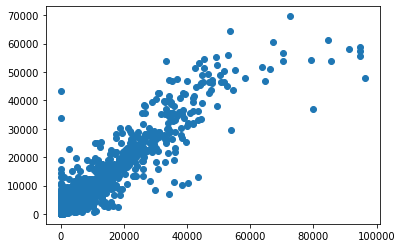

In [40]:
import matplotlib.pyplot as plt 
plt.scatter(Ytest,pred_gred)

Model- 5 using Voting Regressor

In [ ]:
VOTING REGRESSOR

In [179]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

Building the model

In [180]:
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
Voting_Reg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])

Training the model

In [181]:
Voting_Reg.fit(Xtrain,Ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                    

Accuracy Score for test data

In [182]:
Voting_Reg.score(Xtest,Ytest)

0.8242730844141404

Accuracy score for train data

In [183]:
Voting_Reg.score(Xtrain,Ytrain)

0.8688856204779773

Prediction

In [184]:
Voting_pred=Voting_Reg.predict(Xtest)

Model Evaluation

RMSE

In [185]:
Rmse = (np.sqrt(mean_squared_error(Ytest, Voting_pred)))
print(Rmse)

3770.235852871796


MSE

In [186]:
metrics.mean_squared_error(Ytest,Voting_pred)

14214678.38627992

MEAN ABSOLUTE ERROR

In [187]:
metrics.mean_absolute_error(Ytest,Voting_pred)

1592.4037876506502

SCATTER PLOT FOR PEDICTED VALUE V/S ACTUAL

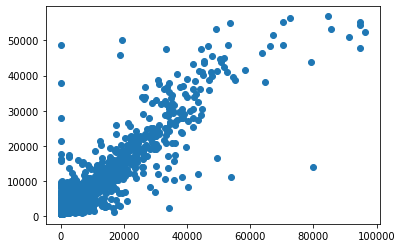

In [229]:
import matplotlib.pyplot as plt 
plt.scatter(Ytest,Voting_pred)

Model-6 using Neural Networks

In [ ]:
NEURAL NETWORKS

In [65]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [149]:
predictor=New_df.iloc[:,0:4]
target=New_df.iloc[:,4]

In [150]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(predictor,target,test_size=0.2,random_state=0)

Building the model

In [161]:
#building my model
NN=Sequential()

NN.add(Dense(50,input_dim=4,activation="relu"))
NN.add(Dense(40,activation="relu"))
NN.add(Dense(20,activation="relu"))
NN.add(Dense(1,kernel_initializer="normal"))
NN.compile(loss="mean_squared_error",optimizer="adam",metrics=["mse"])


Training the model

In [162]:
NN.fit(Xtrain,Ytrain,epochs=10)


Epoch 1/10
561/561 [==============================] - 2s 2ms/step - loss: 34379152.2242 - mse: 34379152.2242
Epoch 2/10
561/561 [==============================] - 1s 2ms/step - loss: 16270015.6410 - mse: 16270015.6410
Epoch 3/10
561/561 [==============================] - 1s 2ms/step - loss: 16647742.9813 - mse: 16647742.9813
Epoch 4/10
561/561 [==============================] - 1s 2ms/step - loss: 15120713.6661 - mse: 15120713.6661
Epoch 5/10
561/561 [==============================] - 1s 2ms/step - loss: 15872565.7696 - mse: 15872565.7696
Epoch 6/10
561/561 [==============================] - 1s 2ms/step - loss: 17383963.3292 - mse: 17383963.3292
Epoch 7/10
561/561 [==============================] - 1s 2ms/step - loss: 15267975.7171 - mse: 15267975.7171
Epoch 8/10
561/561 [==============================] - 1s 2ms/step - loss: 18040619.4199 - mse: 18040619.4199
Epoch 9/10
561/561 [==============================] - 1s 2ms/step - loss: 17900864.6406 - mse: 17900864.6406
Epoch 10/10
561/561

Prediction

In [163]:
NN_pred=NN.predict(Xtest)



Accuracy score

In [244]:
R2_value=r2_score(Ytest,NN_pred)
print(R2_value)

0.764987155150038


In [168]:
pred_NN=pd.Series([i[0] for i in NN_pred])


correlative coefficent

In [169]:
np.corrcoef(pred_NN,Ytest)

array([[1.        , 0.89244082],
       [0.89244082, 1.        ]])

Model Evaluation

RMSE

In [164]:
Rmse = (np.sqrt(mean_squared_error(Ytest, NN_pred)))
print(Rmse)

4360.087206783463


MSE

In [165]:
metrics.mean_squared_error(Ytest,NN_pred)

19010360.450756826

MEAN ABSOLUTE ERROR

In [166]:
metrics.mean_absolute_error(Ytest,NN_pred)

1748.368999184918

SCATTER PLOT FOR PEDICTED VALUE V/S ACTUAL

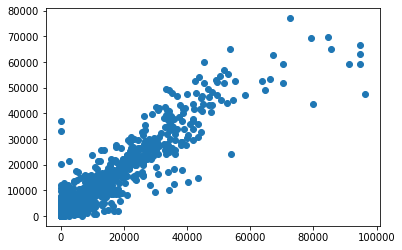

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(Ytest,NN_pred)

In [170]:
predictor=New_df.iloc[:,0:4]
target=pd.DataFrame(New_df.iloc[:,4])

In [171]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(predictor,target,test_size=0.2,random_state=0)

Model-7 using GridSearchCv with Gradien Boosting.

GRADIEN BOOSTING WITH GRID SEARCH CV




In [76]:
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

Building the model with Hyper parameter tuning

In [189]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
GB = GradientBoostingRegressor(**params)

Training the model

In [190]:
GB.fit(Xtrain,Ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy score for test data

In [191]:
GB.score(Xtest,Ytest)

0.8519039636478491

Accuracy score for Train data

In [192]:
GB.score(Xtrain,Ytrain)

0.8722197664632058

Prediction

In [193]:
GB_pred=GB.predict(Xtest)

Model Evaluation

RMSE

In [194]:
Rmse = (np.sqrt(mean_squared_error(Ytest, GB_pred)))
print(Rmse)

3461.155357627748


MSE

In [195]:
metrics.mean_squared_error(Ytest,GB_pred)

11979596.409635263

MEAN ABSOLUTE ERROR

In [196]:
metrics.mean_absolute_error(Ytest,GB_pred)

1313.3835811412578

SCATTER PLOT FOR PEDICTED VALUE V/S ACTUAL

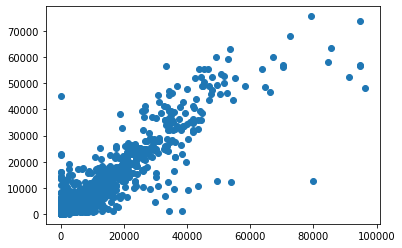

In [197]:
import matplotlib.pyplot as plt 
plt.scatter(Ytest,GB_pred)

Model- 8 using XGBoost

XTREME GRADIENT BOOSTING

In [201]:
from xgboost import XGBRegressor

Building the model

In [202]:
model_XG=XGBRegressor(n_estimators=1000,learning_rate=0.05)

Training the model

In [203]:
model_XG.fit(Xtrain,Ytrain)

[09:31:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Prediction

In [230]:
model_XGB_pred = model_XG.predict(Xtest)


Accuracy score for Test data

In [137]:
model_XG.score(Xtest,Ytest)

0.8569040171505691

Accuracy score for test data

In [138]:
model_XG.score(Xtrain,Ytrain)

0.9999126064668938

Model Evaluation

RMSE

In [231]:
Rmse = (np.sqrt(mean_squared_error(Ytest, model_XGB_pred)))
print(Rmse)

3320.597955231594


MSE

In [232]:
metrics.mean_squared_error(Ytest,model_XGB_pred)

11026370.780288244

MEAN ABSOLUTE ERROR

In [233]:
metrics.mean_absolute_error(Ytest,model_XGB_pred)

1201.9043041283287

SCATTER PLOT FOR PEDICTED VALUE V/S ACTUAL

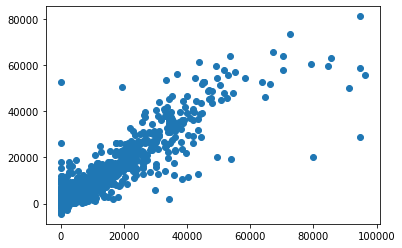

In [234]:
import matplotlib.pyplot as plt 
plt.scatter(Ytest,model_XGB_pred)

Model- 9 using LGBoost.

LIGHT GRADIENT BOOSTING

In [207]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error


Hyper parameter tuning

In [208]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

Building the model

In [209]:
lgb = lgb.LGBMRegressor(**hyper_params)


Training the model

In [210]:
lgb.fit(Xtrain, Ytrain)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.005, max_bin=512,
              max_depth=8, metric=['l2', 'auc'], min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
              n_jobs=-1, num_iterations=100000, num_leaves=128,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, task='train',
              verbose=0)

Accuracy score for test data

In [211]:
lgb.score(Xtest,Ytest)

0.8991406918030839

Accuracy score for  train data

In [212]:
lgb.score(Xtrain,Ytrain)

0.9932548948951484

Prediction

In [213]:
Lgb_pred=lgb.predict(Xtest)

Model Evaluation

RMSE

In [214]:
Rmse = (np.sqrt(mean_squared_error(Ytest, Lgb_pred)))
print(Rmse)

2856.3233381712075


MSE

In [215]:
metrics.mean_squared_error(Ytest,Lgb_pred)

8158583.012181511

MEAN ABSOLUTE ERROR

In [216]:
metrics.mean_absolute_error(Ytest,Lgb_pred)

1122.4941593670724

SCATTER PLOT FOR PEDICTED VALUE V/S ACTUAL

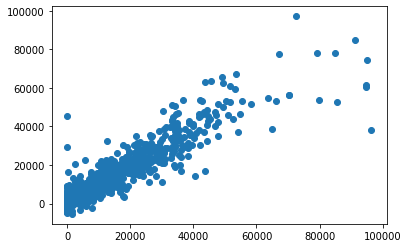

In [217]:
import matplotlib.pyplot as plt 
plt.scatter(Ytest,Lgb_pred)

Model- 10 using Linear Regression

In [235]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
Ln = LinearRegression()

Training the model

In [236]:
Ln.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

test score

In [237]:
Ln.score(Xtest,Ytest)

0.7907905152115354

train score

In [238]:
Ln.score(Xtrain,Ytrain)

0.7710800254567446

In [239]:
Pred_Ln=Ln.predict(Xtest)

Model Evaluation

RMSE

In [240]:
Rmse = (np.sqrt(mean_squared_error(Ytest, Pred_Ln)))
print(Rmse)

4113.770512928723


MSE

In [241]:
metrics.mean_squared_error(Ytest,Pred_Ln)

16923107.83304185

MEAN ABSOLUTE ERROR

In [242]:
metrics.mean_absolute_error(Ytest,Pred_Ln)

1614.713577502536

SCATTER PLOT FOR PEDICTED VALUE V/S ACTUAL

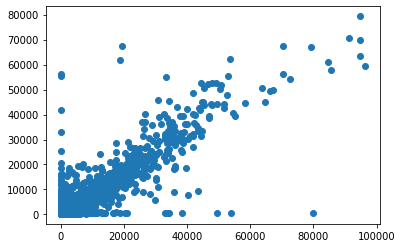

In [243]:
import matplotlib.pyplot as plt 
plt.scatter(Ytest,Pred_Ln)

Here I have build 10 different models using various algorithms. And I found that Model 3 is giving the best scores 91%(test) and 98%(train). Therefor am finalizing my best model as RandomizedSearchCv with RandomForest Regressor(Model3).